In [51]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc
from tqdm import tqdm
from matplotlib.colors import LogNorm

PATH = "../latex/pdf/"
# print(plt.rcParams.keys())
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['savefig.pad_inches'] = 0



In [12]:
def ψ_mn(m, n1, n2): #skalarni produkt
    return np.pi/2 *sc.beta(4+4*m,1+n1+n2)

def A_mn(m, n1, n2):
    return -np.pi/2 * (n1*n2)*(3+4*m)/(2+4*m+n1+n2) * sc.beta(n1+n2-1,3+4*m)

def b_mn(m, n):
    return -2/(2*m+1)*sc.beta(2*m+3,n+1)
        

generating matrix $A^m_{ij}$ inside array $\mathcal{A}  = \left[A^1\;\ldots\; A^m\right]$

In [108]:
NN = 20
MM = 20
Cs = np.zeros((NN,MM))
for N in tqdm(range(NN)):
    for M in range(MM):
        
        # N = 10
        # M = 10
        As = []
        bs = []
        C = 0
        for m in range(M):
            tmpA = np.zeros((N,N))
            tmpb = np.zeros(N)
            for n1 in range(N):
                for n2 in range(N):
                    tmpA[n1,n2] = A_mn(m,n1+1,n2+1)
                tmpb[n1] = b_mn(m,n1+1)
            As.append(tmpA)
            bs.append(tmpb)
            # print(tmpA[:3,:3])
            a = np.linalg.solve(tmpA,tmpb)
            C += np.dot(a,tmpb)
            # print(-32*C/np.pi)
        Cs[N,M] = -32*C/np.pi



100%|██████████| 20/20 [00:02<00:00,  8.65it/s]


GRAPHING $C(N,M)$

In [69]:
Grph = Cs[1:,1:] - Cs[:-1,:-1]
plt.imshow(Grph, cmap='hot', interpolation='nearest', extent=[1,MM,1,NN],norm=LogNorm())
plt.colorbar(label = '$\Delta C$')
plt.title("C v odvisnosti od velikosti N bločnih matrik\nin veliksoti M glavne matrike")
plt.xlabel('M')
plt.ylabel('N')
plt.yticks(range(5,NN+1,5))
plt.savefig(PATH + "C(N,M).pdf")
plt.clf()



<Figure size 432x288 with 0 Axes>

Mesasuring time

In [62]:
from time import time
NN = 20
MM = 20
times = np.zeros((NN,MM))
# Cs = np.zeros((NN,MM))
for N in tqdm(range(NN)):
    for M in range(MM):
        time_s = time()
        # N = 10
        # M = 10
        As = []
        bs = []
        C = 0
        for m in range(M):
            tmpA = np.zeros((N,N))
            tmpb = np.zeros(N)
            for n1 in range(N):
                for n2 in range(N):
                    tmpA[n1,n2] = A_mn(m,n1+1,n2+1)
                tmpb[n1] = b_mn(m,n1+1)
            As.append(tmpA)
            bs.append(tmpb)
            # print(tmpA[:3,:3])
            a = np.linalg.solve(tmpA,tmpb)
            C += np.dot(a,tmpb)
        time_e = time()
        times[N,M] = time_e - time_s
            # print(-32*C/np.pi)
        # Cs[N,M] = -32*C/np.pi

 15%|█▌        | 3/20 [00:00<00:00, 28.65it/s]

100%|██████████| 20/20 [00:02<00:00,  7.27it/s]


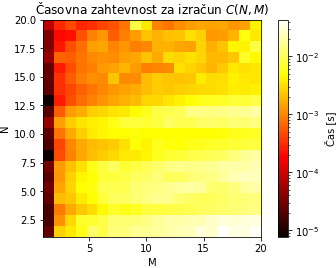

In [64]:
plt.imshow(times, cmap='hot', interpolation='nearest', extent=[1,MM,1,NN],norm=LogNorm())
plt.xlabel('M')
plt.ylabel('N')
plt.colorbar(label = 'Čas [s]')
plt.title("Časovna zahtevnost za izračun $C(N,M)$")
plt.savefig(PATH + "time(N,M).pdf")

Narišemo še primer $\mathcal{A}$

In [79]:
N = 5
M = 20

As = []
bs = []
C = 0
for m in range(M):
    tmpA = np.zeros((N,N))
    tmpb = np.zeros(N)
    for n1 in range(N):
        for n2 in range(N):
            tmpA[n1,n2] = A_mn(m,n1+1,n2+1)
        tmpb[n1] = b_mn(m,n1+1)
    As.append(tmpA)
    bs.append(tmpb)
    # print(tmpA[:3,:3])
    a = np.linalg.solve(tmpA,tmpb)
    C += np.dot(a,tmpb)
    # print(-32*C/np.pi)
# Cs[N,M] = -32*C/np.pi


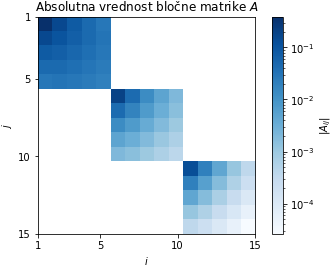

In [106]:
Grph = np.zeros((N*3,N*3))
for m in range(3):
    for i in range(N):
        for j in range(N):
            Grph[i+m*N,j+m*N] = -As[m][i,j]
# print(Grph[:10,:10])
plt.imshow(Grph, cmap='Blues', interpolation='nearest', extent=[1,N*3,N*3,1],norm=LogNorm())
plt.colorbar(label = '$|A_{ij}|$')
ticks = np.array([1]+list(range(5,N*3+1,5)))
plt.xticks(ticks, labels=ticks)
plt.yticks(ticks, labels=ticks)
plt.title("Absolutna vrednost bločne matrike $A$")
plt.xlabel('$i$')
plt.ylabel('$j$')
# plt.rcParams['savefig.bbox'] = 'standard'

plt.savefig(PATH + "A.pdf")
# plt.rcParams['savefig.bbox'] = 'tight'



Natančnost $C(M)$ in $C(N)$ za nek fiksen m,n

In [140]:
#get exaxt C
As = []
bs = []
C = 0
M = 120
N = 120
for m in tqdm(range(M)):
    tmpA = np.zeros((N,N))
    tmpb = np.zeros(N)
    for n1 in range(N):
        for n2 in range(N):
            tmpA[n1,n2] = A_mn(m,n1+1,n2+1)
        tmpb[n1] = b_mn(m,n1+1)
    As.append(tmpA)
    bs.append(tmpb)
    # print(tmpA[:3,:3])
    a = np.linalg.solve(tmpA,tmpb)
    C += np.dot(a,tmpb) * (-32/np.pi)
print(C)

100%|██████████| 120/120 [00:10<00:00, 11.48it/s]

0.7577219624538012


In [136]:
N = 5
MM = 50

As = []
bs = []
plt.grid()
for N in tqdm([5, 10, 15, 30]):
    y = []
    for M in range(MM):
        tmpC = 0
        for m in range(M):
            tmpA = np.zeros((N,N))
            tmpb = np.zeros(N)
            for n1 in range(N):
                for n2 in range(N):
                    tmpA[n1,n2] = A_mn(m,n1+1,n2+1)
                tmpb[n1] = b_mn(m,n1+1)
            As.append(tmpA)
            bs.append(tmpb)
            # print(tmpA[:3,:3])
            a = np.linalg.solve(tmpA,tmpb)
            tmpC += np.dot(a,tmpb)
            # print(-32*C/np.pi)
        y.append( -32*tmpC/np.pi)
    plt.plot(range(1,MM+1),np.abs(np.array(y)-C),label=f"N={N}")
plt.yscale('log')
plt.xlabel('M')
plt.ylabel('$\Delta C$')
plt.legend()
plt.title("Napaka izračuna $C$ v odvisnosti od velikosti M")
plt.savefig(PATH + "C(M).pdf")
plt.clf()

100%|██████████| 4/4 [00:11<00:00,  2.82s/it]


<Figure size 432x288 with 0 Axes>

In [138]:
M = 5
NN = 50

As = []
bs = []
plt.grid()
for M in tqdm([5, 10, 15, 30]):
    y = []
    for N in range(NN):
        tmpC = 0
        for m in range(M):
            tmpA = np.zeros((N,N))
            tmpb = np.zeros(N)
            for n1 in range(N):
                for n2 in range(N):
                    tmpA[n1,n2] = A_mn(m,n1+1,n2+1)
                tmpb[n1] = b_mn(m,n1+1)
            As.append(tmpA)
            bs.append(tmpb)
            # print(tmpA[:3,:3])
            a = np.linalg.solve(tmpA,tmpb)
            tmpC += np.dot(a,tmpb)
            # print(-32*C/np.pi)
        y.append( -32*tmpC/np.pi)
    plt.plot(range(1,MM+1),np.abs(np.array(y)-C),label=f"M={M}")
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('$\Delta C$')
plt.legend()
plt.title("Napaka izračuna $C$ v odvisnosti od velikosti N")
plt.savefig(PATH + "C(N).pdf")
plt.clf()

100%|██████████| 4/4 [00:29<00:00,  7.49s/it]


<Figure size 432x288 with 0 Axes>

kk se asimpotota error-ja spreminja

In [143]:
M = 5
NN = 100

X, Y = [],[]
for M in tqdm(np.arange(5,50,5)):
    y = []
    for N in range(NN):
        tmpC = 0
        for m in range(M):
            tmpA = np.zeros((N,N))
            tmpb = np.zeros(N)
            for n1 in range(N):
                for n2 in range(N):
                    tmpA[n1,n2] = A_mn(m,n1+1,n2+1)
                tmpb[n1] = b_mn(m,n1+1)
            # print(tmpA[:3,:3])
            a = np.linalg.solve(tmpA,tmpb)
            tmpC += np.dot(a,tmpb)
            # print(-32*C/np.pi)
        y.append( -32*tmpC/np.pi)
        if(N>5) and abs(y[-1]-y[-2])<1e-6:
            break
    Y.append(abs(y[-1]-C))
    X.append(M)


100%|██████████| 9/9 [00:01<00:00,  6.45it/s]


In [160]:
MM = 150

XX, YY = [],[]
for N in tqdm(np.arange(5,50,5)):
    prev = now = 0
    for M in range(MM):
        tmpC = 0
        for m in range(M):
            tmpA = np.zeros((N,N))
            tmpb = np.zeros(N)
            for n1 in range(N):
                for n2 in range(N):
                    tmpA[n1,n2] = A_mn(m,n1+1,n2+1)
                tmpb[n1] = b_mn(m,n1+1)
            # print(tmpA[:3,:3])
            a = np.linalg.solve(tmpA,tmpb)
            tmpC += np.dot(a,tmpb)
            # print(-32*C/np.pi)

        if(M>5) and abs(now-prev)<1e-6:
            break
        tmp = now
        now = -32*tmpC/np.pi
        prev = tmp
    YY.append(abs(now-C))
    XX.append(N)

  0%|          | 0/9 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:41<00:00,  4.61s/it]


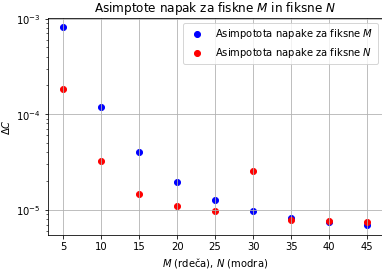

In [171]:
plt.grid()
plt.scatter(X,Y,label="Asimpotota napake za fiksne $M$",color="blue")
plt.scatter(XX,YY,label="Asimpotota napake za fiksne $N$",color="red")
plt.yscale('log')
plt.xlabel(r"$M$ (rdeča), $N$ (modra)")
plt.ylabel('$\Delta C$')
plt.legend()
plt.title("Asimptote napak za fiskne $M$ in fiksne $N$")
# plt.savefig(PATH + "C(N).pdf")
plt.savefig(PATH + "Asimpotote_napak.pdf")